<a href="https://colab.research.google.com/github/devak23/python/blob/master/ml2/01_neural_network_regression_using_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with NeuralNetwork using TensorFlow

There are many definitions for a regression problem but in our case, we are going to simplify it: predicting a numerical value based on the compbination of some input variables, even shorter ... predicting a number.

In [308]:
import tensorflow as tf
print (tf.__version__)

2.15.0


## Create some data to view and fit

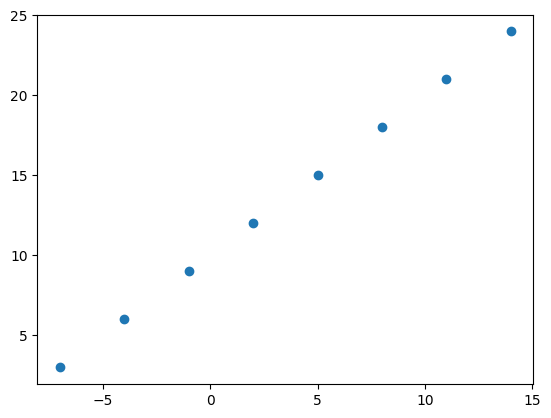

In [309]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y)

In [310]:
X + 10

array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])

In [311]:
y == X + 10 # this is the relationship that we want our neural network to learn

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and Output shapes

In [312]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [313]:
X[0], y[0]

(-7.0, 3.0)

In [314]:
X[1], y[1]

(-4.0, 6.0)

In [315]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [316]:
X[0].ndim

0

In [317]:
X[0], y[0] # We are going to use 1 X value to predict 1 y value

(-7.0, 3.0)

In [318]:
# Turn our numpy array into tensors
X = tf.constant(X)
y = tf.constant(y)
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [319]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

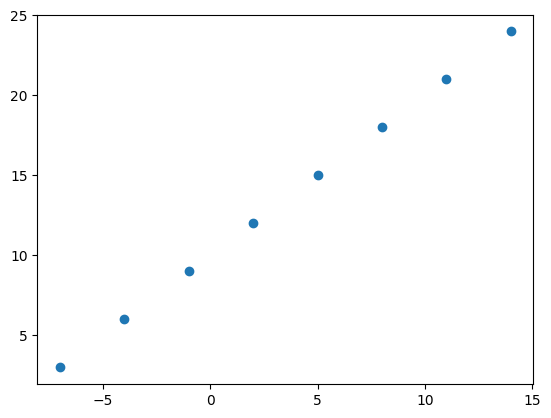

In [320]:
plt.scatter(X, y)

## Steps in modelling with tensorflow

1. **Creating the model** - define input and output layers as well as the hidden layers of a deep learning model
2. **Compiling the model** - define a loss function (in other words, the function which tells our model how wrong it is) and the optimizer  (tells our model how to improve the pattern its learning) and evaulation metrics (What we can use to intepret the performance of our model)
3. **Fitting the model** - letting our model try to find patterns between X and y (features and labels)

In [321]:
tf.reshape(X, shape=(-1,1))

<tf.Tensor: shape=(8, 1), dtype=float64, numpy=
array([[-7.],
       [-4.],
       [-1.],
       [ 2.],
       [ 5.],
       [ 8.],
       [11.],
       [14.]])>

In [322]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create model using sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae, # mae = mean absolute error
              optimizer = tf.keras.optimizers.SGD(), # SGD = stochastic gradient descent
              metrics=["mae"]
)

# 3. Fitting the model
# model.fit(X, y, epochs=5) # this doesn't work!

model.fit(tf.reshape(X, shape=(-1,1)),y, epochs=5) # If we change the epochs to 32 (by experimentation) we can predict the y given X with a good accuracy.

#model.fit(tf.expand_dims(X, axis=-1), y, epochs=5) # This does the same thing.

Epoch 1/5
1/1 [==============================] - 0s 282ms/step - loss: 16.5465 - mae: 16.5465
Epoch 2/5
1/1 [==============================] - 0s 8ms/step - loss: 16.2653 - mae: 16.2653
Epoch 3/5
1/1 [==============================] - 0s 10ms/step - loss: 15.9840 - mae: 15.9840
Epoch 4/5
1/1 [==============================] - 0s 8ms/step - loss: 15.7028 - mae: 15.7028
Epoch 5/5
1/1 [==============================] - 0s 8ms/step - loss: 15.4215 - mae: 15.4215


In [323]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [324]:
# try and make a prediction using our model
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 47ms/step


array([[-7.793491]], dtype=float32)

In [325]:
y_pred + 10 # as you can see that due to the loss function (error), our y value is off. If we add 10 (error) to our prediction is still bad as we expect 27 and we are getting 12

array([[2.206509]], dtype=float32)

## Improving our model

We can improve our model by the steps we took to create our model

1. **Creating a model:** We might add layers, increase the number of hidden units (called as neurons) within each of the hidden layers, change the activation function of each layer

2. **Compiling a model:** We can change the optimization function or perhaps the **learning rate** of the optimization function.

3. **Fitting a model:** Here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from


In [326]:
# Lets rebuild our model

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ['mae'])

# 3. Fit the model (this time we will train for longer)
model.fit(tf.reshape(X, shape=(-1,1)), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 262ms/step - loss: 8.8095 - mae: 8.8095
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 8.6770 - mae: 8.6770
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 8.5445 - mae: 8.5445
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 8.4120 - mae: 8.4120
Epoch 5/100
1/1 [==============================] - 0s 8ms/step - loss: 8.2795 - mae: 8.2795
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 8.1470 - mae: 8.1470
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 8.0145 - mae: 8.0145
Epoch 8/100
1/1 [==============================] - 0s 11ms/step - loss: 7.8820 - mae: 7.8820
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 7.7495 - mae: 7.7495
Epoch 10/100
1/1 [==============================] - 0s 9ms/step - loss: 7.6170 - mae: 7.6170
Epoch 11/100
1/1 [==============================] - 0s 12ms/step - loss: 7.

In [327]:
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 48ms/step


array([[30.104849]], dtype=float32)

In [328]:
# Lets try to add more nodes this time
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

model.compile(loss = tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(learning_rate=0.01), # The most important hyper-parameter of many different neural network
              metrics = ["mae"])

model.fit(tf.reshape(X, shape=(-1, 1)), y, epochs=100)


Epoch 1/100
1/1 [==============================] - 1s 684ms/step - loss: 13.7086 - mae: 13.7086
Epoch 2/100
1/1 [==============================] - 0s 8ms/step - loss: 10.9113 - mae: 10.9113
Epoch 3/100
1/1 [==============================] - 0s 7ms/step - loss: 8.0549 - mae: 8.0549
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 4.0608 - mae: 4.0608
Epoch 5/100
1/1 [==============================] - 0s 12ms/step - loss: 6.5267 - mae: 6.5267
Epoch 6/100
1/1 [==============================] - 0s 8ms/step - loss: 6.2660 - mae: 6.2660
Epoch 7/100
1/1 [==============================] - 0s 7ms/step - loss: 5.1638 - mae: 5.1638
Epoch 8/100
1/1 [==============================] - 0s 7ms/step - loss: 3.8325 - mae: 3.8325
Epoch 9/100
1/1 [==============================] - 0s 8ms/step - loss: 4.5911 - mae: 4.5911
Epoch 10/100
1/1 [==============================] - 0s 8ms/step - loss: 5.0708 - mae: 5.0708
Epoch 11/100
1/1 [==============================] - 0s 7ms/step - loss: 

In [329]:
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 61ms/step


array([[28.9046]], dtype=float32)

## Common ways to improve deep model:

1. Adding layers
2. Increase the number of hidden units
3. Change the activation functions
4. Change the optimization function
5. Change the learning rate of the optimizer
6. Fitting on more data
7. Fitting for longer

## Evaluating a model

In practise a typical workflow you will go through when building a neural network is:

```
Build a model -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it -> tweak it again -> fit it again -> evaluate it again ...
```

So so far we have done all of that **including evaluation** too by the way of predicting a value and checking with our expected results.

When it comes to evaluation, there are 3 words you should memorize: (When you are building model, you should experiment experiment and experiment)

> "Visualize", "Visualize", "Visualize"

Its a good idea to visualize:
* The data - what data are we working with? What does it look like?
* The model - what does our model look like?
* The training - how does our model perform while it learns?
* The predictions - How do the predictions of a model line up against the ground truth (the original labels)


In [330]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [331]:
# make labels for dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

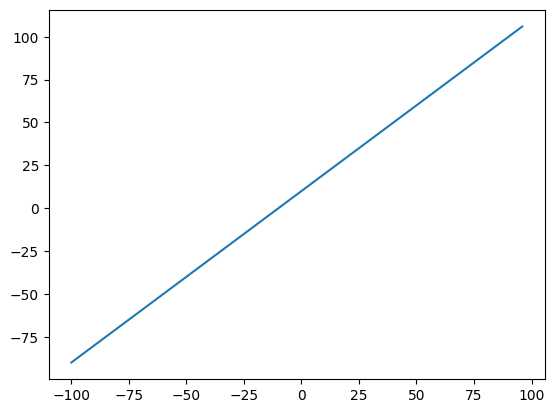

In [332]:
# lets visualize the data
import matplotlib.pyplot as plt

plt.plot(X, y)

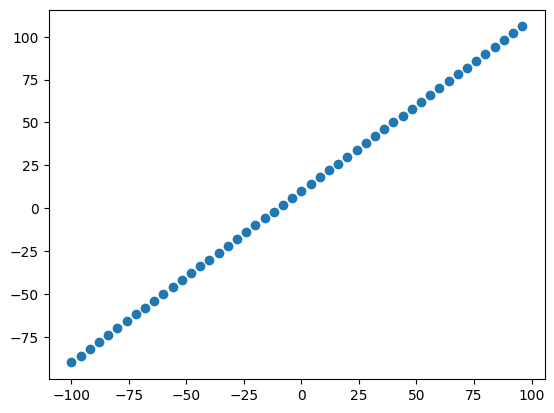

In [333]:
# A better plot is always scatter in such cases
plt.scatter(X, y)

### The 3 sets ...

* **Training set** - the model learns from this data which is typically 70-80% data you have available
* **Validation set** - the model gets tuned on this data, which is typically 10-15% data you have available
* **Test set** - the model gets evaluated on this data, which is typically 10-15% of the total data available

What are we going for in here with all the 3 datasets and model training?

**Generalization** - The ability for a machine learning model to perform well on the data it hasn't seen before


In [334]:
# Check the length of the samples we have
len(X)

50

In [335]:
# Split the data into train and test sets
X_train = X[:40] # First 40 are training samples (80% of the data)
y_train = y[:40]

X_test = X[40:] # last 10 are testing sampels (20% of the data)
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualizing the data

Now that we have got our training and test data sets... lets visualize it again!

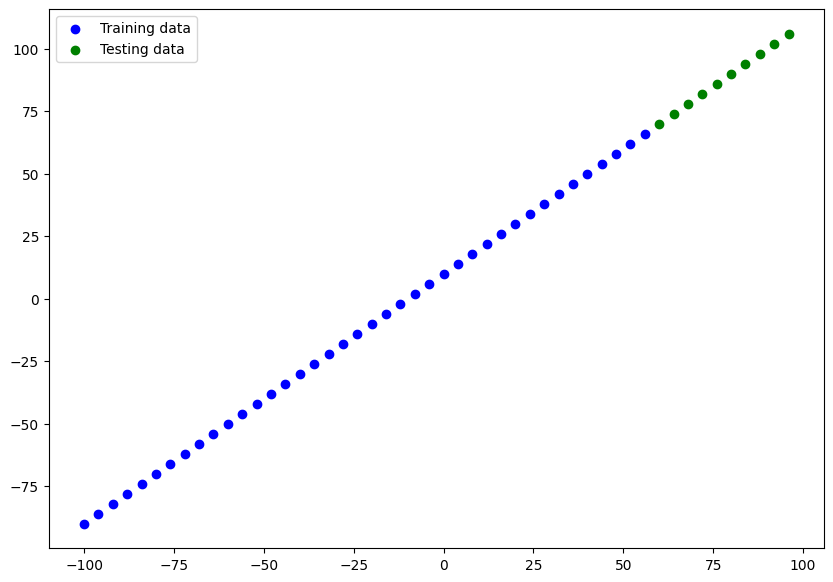

In [336]:
plt.figure(figsize=(10,7))

# plot training data in blue
plt.scatter(X_train, y_train, c="b", label="Training data")
# Plot test data in green
plt.scatter(X_test, y_test, c="g", label="Testing data")
plt.legend()


In [337]:
# Build the model with the training data
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              loss=tf.keras.losses.mae,
              metrics=['mae'])

model.fit(tf.reshape(X_train, shape=(-1,1)), y_train, epochs=100, verbose=0)


In [338]:
# Now lets use the testing data to see if our model has learnt the relation
model.predict(X_test), y_test

1/1 [==============================] - 0s 70ms/step


(array([[ 68.65049 ],
        [ 72.57198 ],
        [ 76.49348 ],
        [ 80.41497 ],
        [ 84.336464],
        [ 88.25796 ],
        [ 92.17945 ],
        [ 96.100945],
        [100.02244 ],
        [103.943924]], dtype=float32),
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

## We can also visualize the model

In [339]:
model.summary()

Model: "sequential_59"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_140 (Dense)           (None, 50)                100       
                                                                 
 dense_141 (Dense)           (None, 50)                2550      
                                                                 
 dense_142 (Dense)           (None, 1)                 51        
                                                                 
Total params: 2701 (10.55 KB)
Trainable params: 2701 (10.55 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [340]:
# Lets create a model which builds automatically bu defining the input_shape argument
tf.random.set_seed(42)

# Create a model
new_model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])

# compile the model
new_model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

new_model.summary()

Model: "sequential_60"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_143 (Dense)           (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* Total params - total number of parameters in the model. These are the patterns that our model is going to learn. In our case, we are trying to learn the pattern between X and y.
* Trainable params - these are parameters (patterns) the model can update as it trains
* Non-traininable params - these parameters aren't updated during training (this is typical when you bring in already learnt patterns or parameters from other models during **transfer learning**)

📚 **Resource:** For more in-depth overview of the trainable parameters within a layer, check out MIT's introduction to deep learning video

🏋 **Exercise:** Try playing around with number of hidden units in the dense layer, see how that effects the number of parameters (total and trainable) by calling `model.summary()`

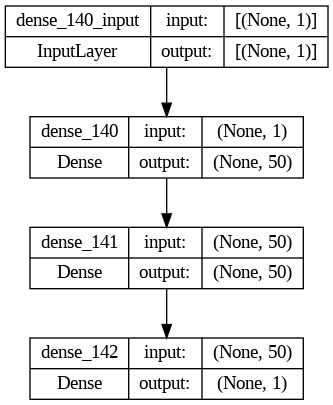

In [341]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True)

 ### Visualizing our model's prediction

 To visualize predictions, its a good idea to plot them against the ground truth labels

 Often you will see this in the form of `y_test` or `y_true` versus `y_pred` (ground truths Vs your model)

In [342]:
# Make some predictions
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 37ms/step


array([[ 68.65049 ],
       [ 72.57198 ],
       [ 76.49348 ],
       [ 80.41497 ],
       [ 84.336464],
       [ 88.25796 ],
       [ 92.17945 ],
       [ 96.100945],
       [100.02244 ],
       [103.943924]], dtype=float32)

🔑 **NOTE:** If you feel like you're going to reuse some kind of functionality in the future, its a good idea to turn it into a function.

In [343]:
# Lets create a plotting function
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  """
  Plots training data, test data and compares the predictions to the ground truth labels
  """

  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")

  # Plot testing data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")

  # Plot model's predictions in red
  plt.scatter(test_data, predictions, c="r", label="Predictions")

  # show the legend
  plt.legend()


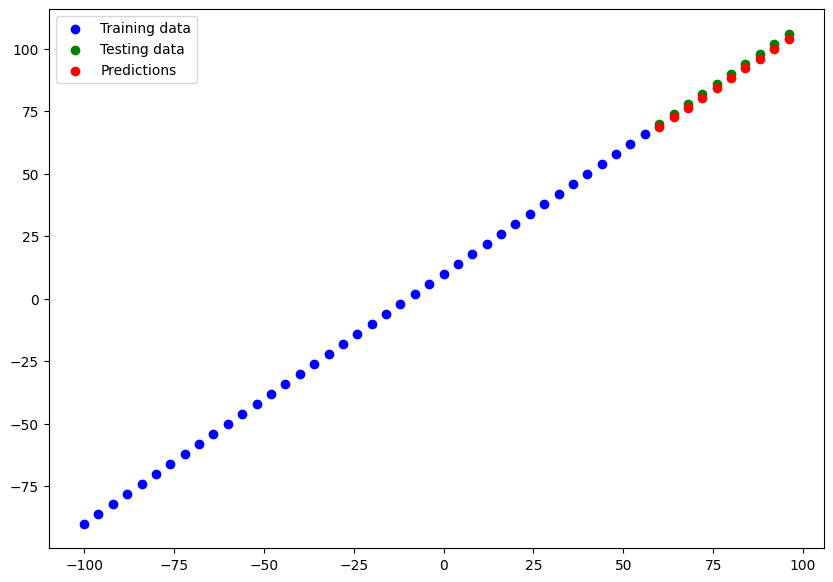

In [344]:
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_pred)

### Evaulating our model's prediction with regression evaluation metrics

Depending on the problem you are working on there will be a different evaulation metrics to evaluate your model's performance.

Since we are working on the regression, two of the main metrics are:
* MAE - mean absolute error; "on average how wrong is each of my model's predictions"
* MSE - mean squared error; "Square the average errors"

In [345]:
# Evaluate the model on the test set
model.evaluate (X_test, y_test)

1/1 [==============================] - 0s 142ms/step - loss: 1.7028 - mae: 1.7028


[1.7027900218963623, 1.7027900218963623]

In [346]:
y_pred, y_test, tf.squeeze(y_pred)

(array([[ 68.65049 ],
        [ 72.57198 ],
        [ 76.49348 ],
        [ 80.41497 ],
        [ 84.336464],
        [ 88.25796 ],
        [ 92.17945 ],
        [ 96.100945],
        [100.02244 ],
        [103.943924]], dtype=float32),
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([ 68.65049 ,  72.57198 ,  76.49348 ,  80.41497 ,  84.336464,
         88.25796 ,  92.17945 ,  96.100945, 100.02244 , 103.943924],
       dtype=float32)>)

In [347]:
# Calculate the absolute mean error
mae = tf.metrics.mean_absolute_error(y_true=y_test, y_pred=tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=1.70279>

In [348]:
# Calcuate the mean square error
mse = tf.metrics.mean_squared_error(y_true=y_test, y_pred=tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=2.9503417>

In [349]:
# Make some functions to reuse MAE and MSE
def errors(y_true, y_pred):
  return (tf.metrics.mean_absolute_error(y_true=y_true, y_pred=tf.squeeze(y_pred)).numpy(),
  tf.metrics.mean_squared_error(y_true=y_true, y_pred=tf.squeeze(y_pred)).numpy())

### Running experiments to improve our model

```
Build model -> fit it ->  evaluate it -> tweak it -> fit it-> evaluate it -> tweak it -> fit it -> evaluate it ...
```

1. Get more data -get more examples for your model to train on (more opportunities to learn patterns or relationships between features and labels)
2. Make your model larger (using more complex model) - this might come in the form of more layers or more hidden units in each layer
3. Train for longer - give your model more of a chance to find patterns in the data.

Lets do 3 modelling experiments:

1. `model_1` - same as original model: 1 layer, trained for 100 epochs
2. `model_2` - 2 layers, trained for 100 epochs
3. `model_3` - 2 layers, trained for 500 epochs

**Build `model_1`**

In [350]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# 3. Fit the model
model_1.fit(tf.reshape(X_train, shape=(-1,1)), y_train, epochs=100, verbose=False)

Model: "sequential_61"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_144 (Dense)           (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


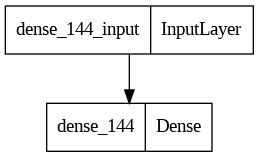

In [351]:
model_1.summary()
plot_model(model_1)

1/1 [==============================] - 0s 36ms/step


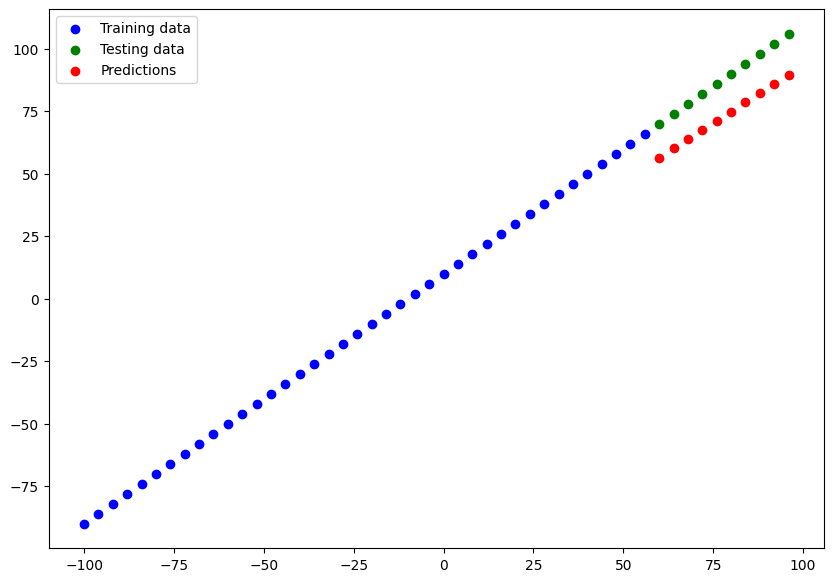

In [352]:
# Make and plot predictions for model_1
y_pred1 = model_1.predict(X_test)

# Plot the predictions
plot_predictions(predictions=y_pred1)

In [353]:
# Calculate mode_1 evaluation metrics
mae_1, mse_1 = errors(y_test, y_pred1)
mae_1, mse_1

(14.993975, 225.67207)

**Build `model_2`**

* 2 dense layers, trained for 100 epochs

In [354]:
tf.random.set_seed(42)

# 1. Create the model with 2 dense layers
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.MAE,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# 3. Fit the model
model_2.fit(tf.reshape(X_train, shape=(-1,1)), y_train, epochs=100, verbose=False)


In [355]:
# 4. Summarize and Visualize the model
model_2.summary()

Model: "sequential_62"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_145 (Dense)           (None, 10)                20        
                                                                 
 dense_146 (Dense)           (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


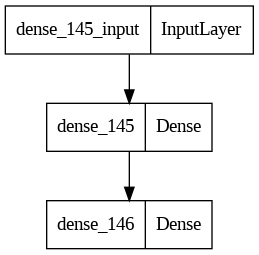

In [356]:
# Visualize the model
plot_model(model_2)

In [357]:
# 5. Make predictions using the model
y_pred2 = model_2.predict(X_test)

1/1 [==============================] - 0s 48ms/step


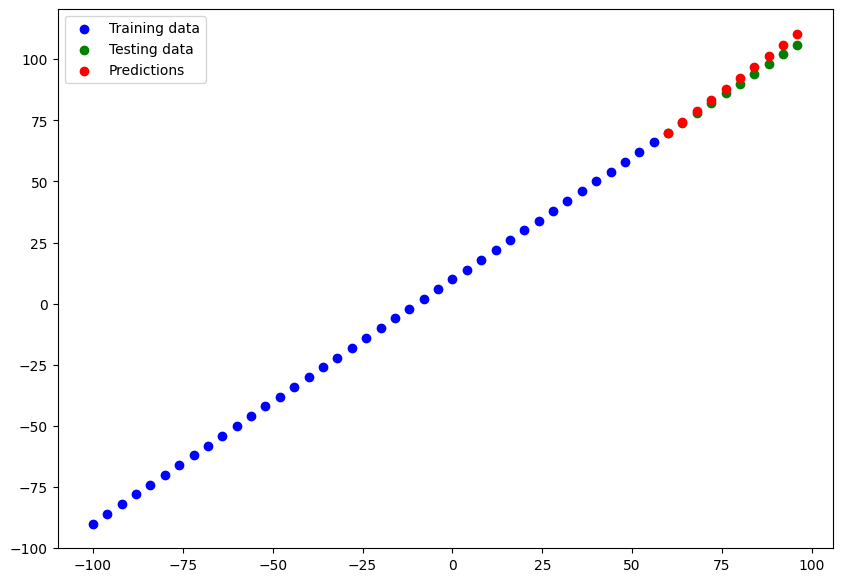

In [358]:
# 6. Plot the predictions
plot_predictions(predictions=y_pred2)

In [359]:
# 6. Calculate the mean squared error and mean errors of the model
mae_2, mse_2 = errors(y_test, y_pred)
mae_2, mse_2

(1.70279, 2.9503417)

**Build `model_3`**

2 layers, trained for 500 epochs

Model: "sequential_63"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_147 (Dense)           (None, 50)                100       
                                                                 
 dense_148 (Dense)           (None, 1)                 51        
                                                                 
Total params: 151 (604.00 Byte)
Trainable params: 151 (604.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
1/1 [==============================] - 0s 39ms/step


(68.06587, 4717.887)

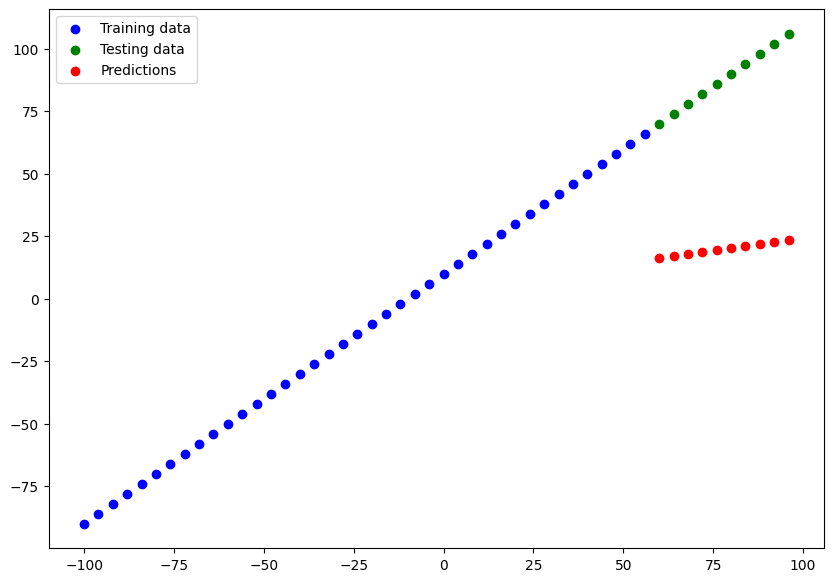

In [360]:
# The seed for reproduciblity
tf.random.set_seed(42)

# 1. Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.MAE,
                optimizer= tf.keras.optimizers.SGD(),
                metrics=['mae'])

# 3. Fit the model
model_3.fit(tf.reshape(X_train, shape=(-1,1)), y_train, epochs=500, verbose=False)

# 4. Summarize and plot the model
model_3.summary()
plot_model(model_3)

# 5. Make some predictions using model_3
y_pred3 = model_3.predict(X_test)
y_pred3

# 6. Plot the predictions
plot_predictions(predictions=y_pred3)

# 7. Calculate the metrics of model_3
mae_3, mse_3 = errors(y_test, y_pred3)
mae_3, mse_3


🔑 **NOTE:** You want to start with small experiments (small models) and make sure they work and then increase the scale when necessary.

## Comparing the results of our experiments

We have run a few experiments now. Lets compare the results.


In [361]:
# Let's compare our model's results using a pandas DataFrame
import pandas as pd

model_results = [['model_1', mae_1, mse_1],
                 ['model_2', mae_2, mse_2],
                 ['model_3', mae_3, mse_3]]

all_results = pd.DataFrame(model_results, columns=['model', 'mae', 'mse'])
all_results

,model,mae,mse
0,model_1,14.993975,225.672073
1,model_2,1.702790,2.950342
2,model_3,68.065872,4717.887207


Looks like `model_2` performed the best.

>🔑 **Note:** One of the main goals should be to minimize the time between your experiments. The more experiments you do, the more things you will figure out which don't work and in turn you will get closer to figuring out what does work.

>☝ **Remember:**
1. the machine learning practioner's motto: "experiment, experiment, experiment.
2. Another thing you will remember is "when in doubt, code it out
3. And finally... Visualize, visualize, visualize

## Tracking your experiments

One really good habit in machine learning modelling is to track the results of your experiments.

And when doing so, it can be tedious if you are running lots of experiments.

Luckily, there are tools to help us!

📚 **Resource:** As you build more models, you will want to look into using:

* TensorBoard - a component of the TensorFlow library to help track modelling experiments (we'll see this one later)
* Weights and Biases - a tool for tracking all kinds of machine learning experiments (plugs straight into TensorBoard)


## Saving our models

Saving our models allows us to use them outside of Google's Colab (or wherever they were trained) as such in a web application or a mobile app

There are two main formats that we can save our models to:

1. The SavedModel format
2. The HDF5 format

In [362]:
# Save the model using SavedModel format
model_2.save("best_model_SavedModel_format")

In [363]:
# Save the model using the HDF5 format
model_2.save("best_model_SavedModel.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Loading a Saved model

In [364]:
# Load in the SavedModel format model

savedModel_format = tf.keras.models.load_model("best_model_SavedModel_format")
savedModel_format

In [365]:
h5Model_format = tf.keras.models.load_model("best_model_SavedModel.h5")
h5Model_format

In [366]:
# Compare model_2 predictions with SavedModel format model predictions
model2_preds = model_2.predict(X_test)
model2_savedModel_predicts = savedModel_format.predict(X_test)
model2_preds == model2_savedModel_predicts

1/1 [==============================] - 0s 46ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [367]:
# Compare the model2_predictions with HDF5 format model predictions
model2_h5_preds = h5Model_format.predict(X_test)
model2_preds == model2_h5_preds

1/1 [==============================] - 0s 41ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

## Download a model (or any other file) from Google Colab

1. Right click the file and click download.
2. Use code (see below)
3. Save it to google drive (second code below)

In [368]:
# Download from Google Colab
from google.colab import files

files.download("/content/best_model_SavedModel.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [369]:
# Save a file from Google Colab into Google drive (requires mounting of google drive)
!cp /content/best_model_SavedModel.h5 "/content/drive/MyDrive/Colab Notebooks"

In [370]:
!ls "/content/drive/MyDrive/Colab Notebooks"

best_model_SavedModel.h5  ML101.ipynb  TensorFlow


## A larger example

In [371]:
# Import libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd

In [372]:
# Read the dataset from insurance.csv on kaggle
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


Our dependent variable is the "charges" and the independent variables are all the others

In [373]:
insurance["smoker"], insurance["age"]

(0       yes
 1        no
 2        no
 3        no
 4        no
        ... 
 1333     no
 1334     no
 1335     no
 1336     no
 1337    yes
 Name: smoker, Length: 1338, dtype: object,
 0       19
 1       18
 2       28
 3       33
 4       32
         ..
 1333    50
 1334    18
 1335    18
 1336    21
 1337    61
 Name: age, Length: 1338, dtype: int64)

So some columns are numerical and some are categorical. So we need to do a "one-hot-encoding"

In [374]:
insurance_ohe = pd.get_dummies(insurance)
insurance_ohe

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [375]:
# Create X and y values (features and labels)
y = insurance_ohe['charges']
X = insurance_ohe.drop('charges', axis=1)
X,y

(      age     bmi  children  sex_female  sex_male  smoker_no  smoker_yes  \
 0      19  27.900         0           1         0          0           1   
 1      18  33.770         1           0         1          1           0   
 2      28  33.000         3           0         1          1           0   
 3      33  22.705         0           0         1          1           0   
 4      32  28.880         0           0         1          1           0   
 ...   ...     ...       ...         ...       ...        ...         ...   
 1333   50  30.970         3           0         1          1           0   
 1334   18  31.920         0           1         0          1           0   
 1335   18  36.850         0           1         0          1           0   
 1336   21  25.800         0           1         0          1           0   
 1337   61  29.070         0           1         0          0           1   
 
       region_northeast  region_northwest  region_southeast  region_southw

In [376]:
# Create training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [377]:
# Build neural network (sort of like model_2 above)
model_2.summary()

Model: "sequential_62"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_145 (Dense)           (None, 10)                20        
                                                                 
 dense_146 (Dense)           (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [378]:
tf.random.set_seed(42)

# Step1: Create model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Step2: Compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.SGD(),
                        metrics=['mae'])

# Step3: Fit the model
insurance_model.fit(X_train, y_train, epochs=100, verbose=False)

In [379]:
# Step4: Check the results of insurance models on test data
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7715.6157 - mae: 7715.6157


[7715.61572265625, 7715.61572265625]

In [380]:
y_train.mean(), y_train.median()

(13346.089736364485, 9575.4421)

Right now it looks like our model isn't performing too well. Lets try and improve it

To try improving our model, we will run 2 experiments

1. Add an extra laye rwith more hidden units and use the Adam optimizer
2. Same as above but train for longer (200 epochs)
3. (insert your own experiment here)

In [381]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
insurance_model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model2.compile(loss=tf.keras.losses.mae,
                         optimizer=tf.keras.optimizers.Adam(),
                         metrics=['mae'])


# 3. Fit the model
insurance_model2.fit(X_train, y_train, epochs=100, verbose=0)

In [382]:
# 4. Evaluate the large model
insurance_model2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 5262.8799 - mae: 5262.8799


[5262.8798828125, 5262.8798828125]

In [383]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7715.6157 - mae: 7715.6157


[7715.61572265625, 7715.61572265625]

In [384]:
# Lets define a new_model function that will customize the model function
def new_model(layers,
              X_train,
              y_train,
              X_test,
              y_test,
              loss_function=tf.keras.losses.mae,
              optimizer_function=tf.keras.optimizers.SGD(),
              metric_function=['mae'],
              epoch_count=100,
              verbose=False):
  """
  This method creates the model based on the parameters passed such as :
  layers: is a 2 dimensional array of numbers indicating the number of units
          at each layer. Do Not define the output layer as it is defined by
          the function
  optimizer: the choice of any optimizer. SGD by default
  X_train: training set of independent variables
  y_train: training set of dependent variables
  X_test: testing set of independent variables
  y_test: testing set of dependent variables
  metrics: defaulted to mae
  epochs: defaulted to 100 and
  verbose: defaulted to false
  """

  tf.random.set_seed(42)

  # 1. Create the model
  model = tf.keras.Sequential()
  for layer in layers:
    model.add(tf.keras.layers.Dense(layer))

  # defining the output layer
  model.add(tf.keras.layers.Dense(1))

  # 2. Compile the model
  model.compile(loss=loss_function,
                optimizer=optimizer_function,
                metrics=metric_function)

  # 3. Fit the model
  history = model.fit(X_train, y_train, epochs=epoch_count, verbose=verbose)

  # 4. Evaluate the model
  evaluation = model.evaluate(X_test, y_test)

  print(evaluation)
  print(model.summary())

  return model, history

9/9 [==============================] - 0s 2ms/step - loss: 3487.0940 - mae: 3487.0940
[3487.093994140625, 3487.093994140625]
Model: "sequential_66"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_154 (Dense)           (None, 100)               1200      
                                                                 
 dense_155 (Dense)           (None, 10)                1010      
                                                                 
 dense_156 (Dense)           (None, 1)                 11        
                                                                 
Total params: 2221 (8.68 KB)
Trainable params: 2221 (8.68 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


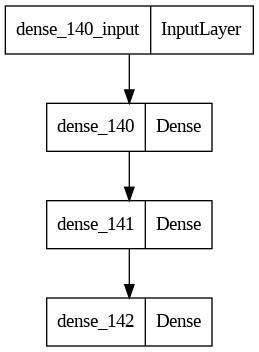

In [385]:
insurance_model3, history = new_model([100, 10], X_train, y_train, X_test, y_test, epoch_count=200, optimizer_function=tf.keras.optimizers.Adam())
plot_model(model)

Text(0.5, 0, 'Epochs')

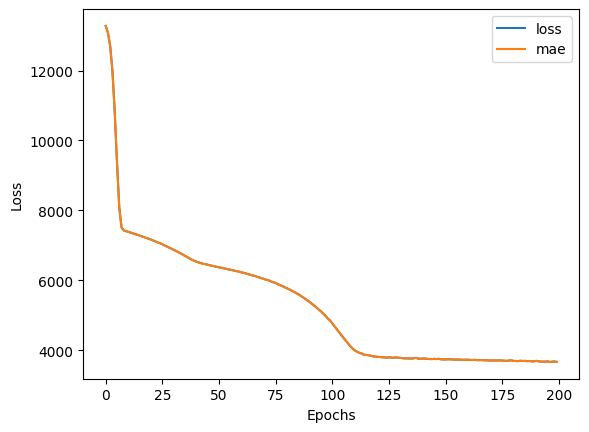

In [386]:
# Plot history (also known as a loss curve or training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("Loss")
plt.xlabel("Epochs")

So the mae goes down as epochs count goes up and that indicates our model's prediction wont be grossly wrong. But then...

>❓❓ **Question is:** How long should one train for?

It depends. Really... It depends on the problem you're working on. However, many people have asked this question before... so TensorFlow has a solution! Its called [EarlyStopping Callback](https://keras.io/api/callbacks/early_stopping) which is a TensorFlow component which you can add to your model to stop training when the improvement in the monitored metric has stopped.

🏋 **Exercise:** Read about the early stopping callaback and try to implement in the new_model function that you just created.

## Preprocessing data (normalization and standardization)

<Axes: ylabel='Frequency'>

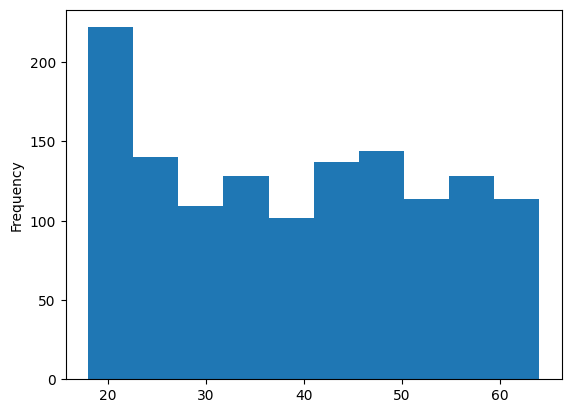

In [387]:
# Lets see how the data looks for different parameters
X['age'].plot(kind="hist")

<Axes: ylabel='Frequency'>

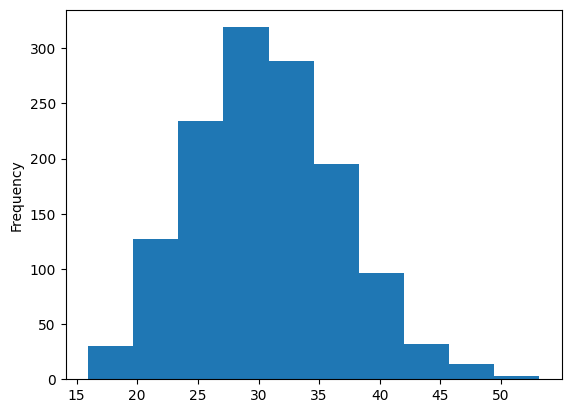

In [388]:
X['bmi'].plot(kind='hist')

<Axes: ylabel='Frequency'>

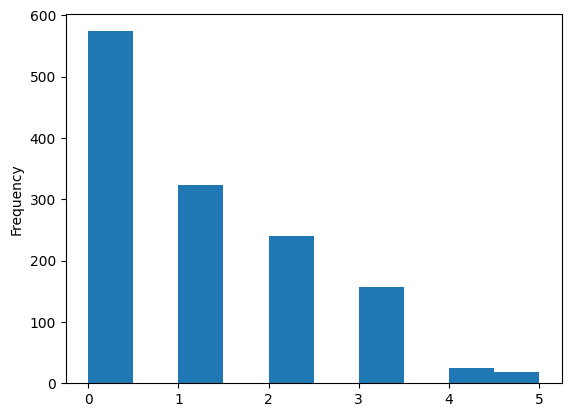

In [389]:
X["children"].plot(kind='hist')

What if we were to plot them on the same chart in a similar scale? That's what normalization does -- ie. to have a common scale (X-axis)

In terms of scaling values, neural networks tend to prefer normalization. If you are not sure on which to use (StandardScalar/MinMaxScalar) try to use both and see which performs better.

In [390]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Read in the insurance dataframe
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [391]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # turn all values in these columns between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Create our X & y values
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Building our training and testing sets
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the column transformer to our training data
ct.fit(X_train)

# transform training and test data with normalization (MinMaxScaler) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [392]:
# What does our nomalized data look like now?
X_train.loc[42], X_train_normal[42]

(age                41
 sex              male
 bmi             21.78
 children            1
 smoker             no
 region      southeast
 Name: 42, dtype: object,
 array([0.36956522, 0.31584611, 0.6       , 1.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 0.        ,
        1.        ]))

In [393]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

The extra shape you see in `X_train_normal` is due to the OneHotEncoding we did for categorical. Now we will build the neural network that takes in the X_train_normal, X_test_normal

In [394]:
insurance_normal_model, history = new_model(layers=[100, 10]
                                   , X_train=X_train_normal
                                   , y_train=y_train
                                   , X_test=X_test_normal
                                   , y_test=y_test
                                   , optimizer_function=tf.keras.optimizers.Adam())

9/9 [==============================] - 0s 2ms/step - loss: 3436.4333 - mae: 3436.4333
[3436.433349609375, 3436.433349609375]
Model: "sequential_67"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_157 (Dense)           (None, 100)               1200      
                                                                 
 dense_158 (Dense)           (None, 10)                1010      
                                                                 
 dense_159 (Dense)           (None, 1)                 11        
                                                                 
Total params: 2221 (8.68 KB)
Trainable params: 2221 (8.68 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


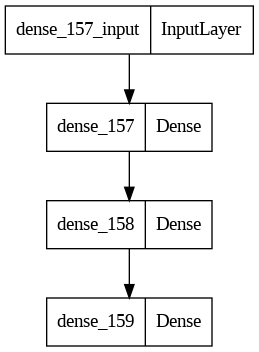

In [395]:
plot_model(insurance_normal_model)